## Simulation of Prices of Coupon-Bearing Bonds using CIR

In [25]:
import numpy as np 
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [27]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [28]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [29]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    110.172397
2    111.761179
3    109.276287
dtype: float64

In [30]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028165,0.024955,0.029998
2,0.024797,0.023108,0.031218
3,0.024044,0.026601,0.030525
4,0.022879,0.022421,0.030556


In [31]:
erk.bond_price(5, 100, .05, 12, rates[[1,2,3,4,5]])

,1,2,3,4,5
0,109.275393,109.275393,109.275393,109.275393,109.275393
1,110.014316,111.576931,109.132794,107.698543,109.709259
2,111.46843,112.286847,108.415953,107.627968,108.519557
3,111.639983,110.43016,108.601119,108.523243,106.110925
4,111.993277,112.208967,108.446618,108.169779,108.550398
...,...,...,...,...,...
116,100.416667,100.416667,100.416667,100.416667,100.416667
117,100.416667,100.416667,100.416667,100.416667,100.416667
118,100.416667,100.416667,100.416667,100.416667,100.416667
119,100.416667,100.416667,100.416667,100.416667,100.416667


<AxesSubplot:>

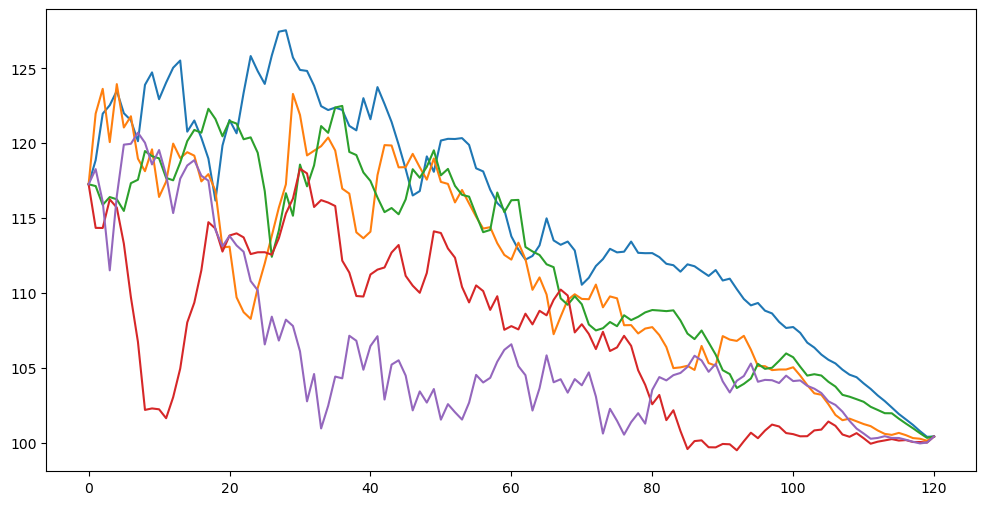

In [32]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

In [33]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.260292,117.260292,117.260292,117.260292,117.260292
1,118.872671,121.981398,117.138499,114.347099,118.270953
2,121.972331,123.633924,115.885286,114.342138,116.08904
3,122.539292,120.076033,116.405302,116.250433,111.5106
4,123.5,123.948523,116.256458,115.701481,116.464893
...,...,...,...,...,...
116,101.555332,100.502821,101.278135,100.174275,100.194306
117,101.189142,100.307727,100.964644,100.045627,100.062337
118,100.77128,100.263825,100.633079,100.046665,99.950864
119,100.39161,100.129218,100.321619,100.00814,100.00922


In [34]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [39]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1      0.0284
2    0.029921
3    0.029605
4    0.031706
dtype: object

In [42]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.555332,100.502821,101.278135
117,101.189142,100.307727,100.964644
118,100.77128,100.263825,100.633079
119,100.39161,100.129218,100.321619
120,100.416667,100.416667,100.416667


In [43]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,191.805978,122.120738,169.616105
117,194.031696,117.537452,169.915586
118,189.95469,123.158249,168.137351
119,191.607486,122.518735,169.334463
120,190.978902,113.118254,173.000619


In [44]:
price_30[[1,2,3]].head()

,1,2,3
0,139.531564,139.531564,139.531564
1,144.110248,152.753319,139.468275
2,153.095757,157.928562,136.428144
3,155.120578,148.061479,138.041146
4,158.371011,159.717604,137.900245


In [45]:
# Making a 60/40 mix 10y/30y

rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = 0.6*rets_10 + .4*rets_30    # assuming we are rebalancing back to 60/40 at the end of every month


In [47]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035935,0.00365,-0.274603,3.530024,-0.001152,-0.000509,1.582624,-0.000288


In [48]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [50]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [51]:
rets_bonds.shape

(120, 500)

In [52]:
# Stock/bond mix for the first time

rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059399,0.004898,-0.178148,2.887644,-0.002431,-0.001793,5.841396,0.0
